In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("C:/Users/StatLab/downloads/Data - 10 - 3.csv")
df

,PM10,AQI
0,61.5,97
1,68.5,92
2,95.0,178
3,130.0,193
4,106.0,139
5,172.0,252
6,129.0,178
7,56.0,87
8,116.0,116
9,93.0,105


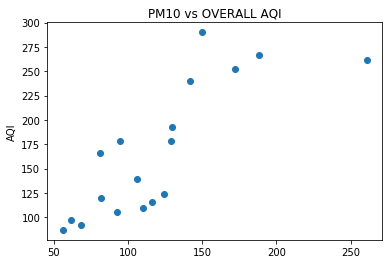

In [10]:
plt.figure()
plt.title("PM10 vs OVERALL AQI")
plt.scatter(df.PM10 , df.AQI)
plt.ylabel('AQI')
plt.show()

In [11]:
import statsmodels.formula.api as smf
#import statsmodels.api as sm

In [12]:
#y = df["AQI"].tolist()
#x = df["PM10"].tolist()
df_model = smf.ols('AQI~PM10',data=df).fit()
df_model.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     30.23
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           4.86e-05
Time:                        09:11:14   Log-Likelihood:                -91.461
No. Observations:                  18   AIC:                             186.9
Df Residuals:                      16   BIC:                             188.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6489     25.713      1.425      0.173     -17.860      91.158
PM10           1.0879      0.198      5.498      0.000       0.668       1.507
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.677
Skew:                           0.423   Prob(JB):                        0.713
Kurtosis:                       2.569   Cond. No.                         343.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
def test_model(col):
    s = []
    for i in col:
        a = [1,i]
        s.append(a)
    return(np.array(s))
prof_model = test_model(df['AQI'])


In [23]:
# HYPOTHESIS :
# H0 : Homoscedasticity is present the residuals are distributed with eqaul variance
# H1 : Hetroscedasticity is present the residuals are not distributed with eqaul variance

# BP test :
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(df_model.resid,prof_model)
print('LM-test p_value')
print(bp_test[1])

LM-test p_value
0.023956891495050668


In [24]:
#Removing Hetroscedasticity 
#Log transform

df['Log_AQI'] = np.log(df['AQI'])
f = 'Log_AQI~PM10'
df_model = ols(formula=f,data=df).fit()


In [25]:
Log_NOX_model = test_model(df['Log_AQI'])
bp_test = het_breuschpagan(df_model.resid,Log_NOX_model)
print('LM-test p_value')
print(bp_test[1])

LM-test p_value
0.0604757827695802


In [30]:
#Box cox transform

from scipy import stats
x,_ = stats.boxcox(df['AQI'])
df['trans_AQI'] = x
f = 'trans_AQI~PM10'
df_model1 = ols(formula=f,data = df).fit()



C:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [31]:
# Using the same 2d reshaping function as the previous step

trans_AQI_model = test_model(df['trans_AQI'])
bp_test = het_breuschpagan(df_model1.resid,trans_AQI_model)
print('LM-test p_value')
print(bp_test[1])

LM-test p_value
1.0


C:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model
